Mean Squared Error: 24.601753959535912
R-squared: 0.6645235947291668


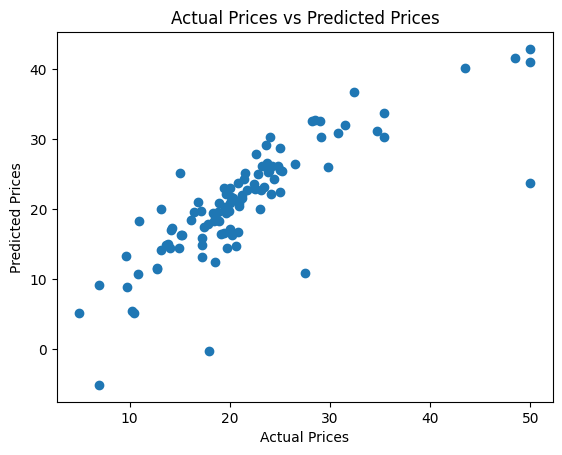

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset from CSV file
file_path = '/content/HousingData.csv'
data = pd.read_csv(file_path)

# Data cleaning
# Check for missing values and fill with median
data = data.fillna(data.median())

# Handle outliers by capping to 99th percentile
for col in data.columns:
    upper_limit = data[col].quantile(0.99)
    data[col] = np.where(data[col] > upper_limit, upper_limit, data[col])

# Define features and target
features = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
X = data[features]
y = data['MEDV']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Plot the predictions vs actual prices
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()


             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.240761   10.709486   11.008241    0.067194    0.554695    6.282047   
std      6.866037   22.811031    6.656120    0.250605    0.115878    0.694306   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.083235    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.253715    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      2.808720    0.000000   18.100000    0.000000    0.624000    6.623500   
max     41.370330   90.000000   25.650000    1.000000    0.871000    8.335000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.845850    3.778037    9.549407  407.792490   18.452372  356.674032   
std     27.486962    2.0532

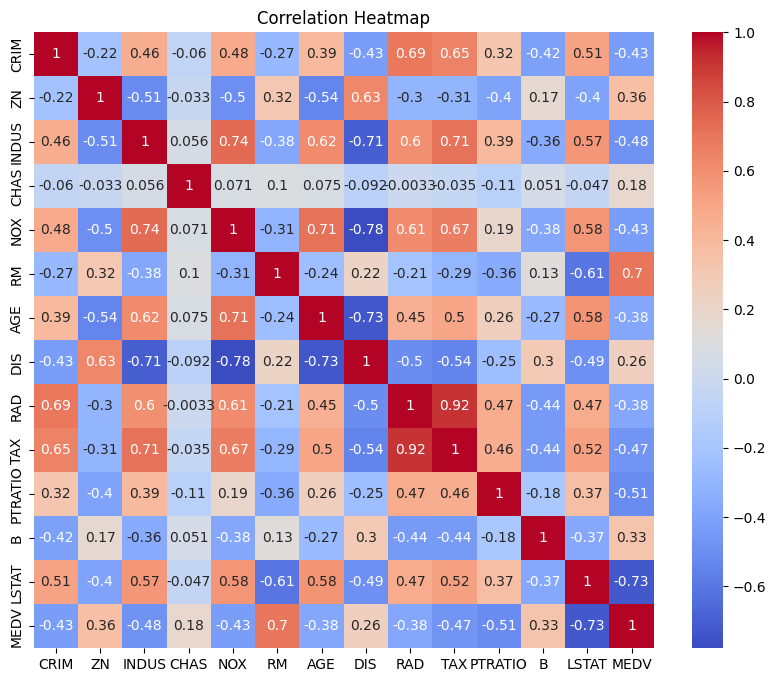

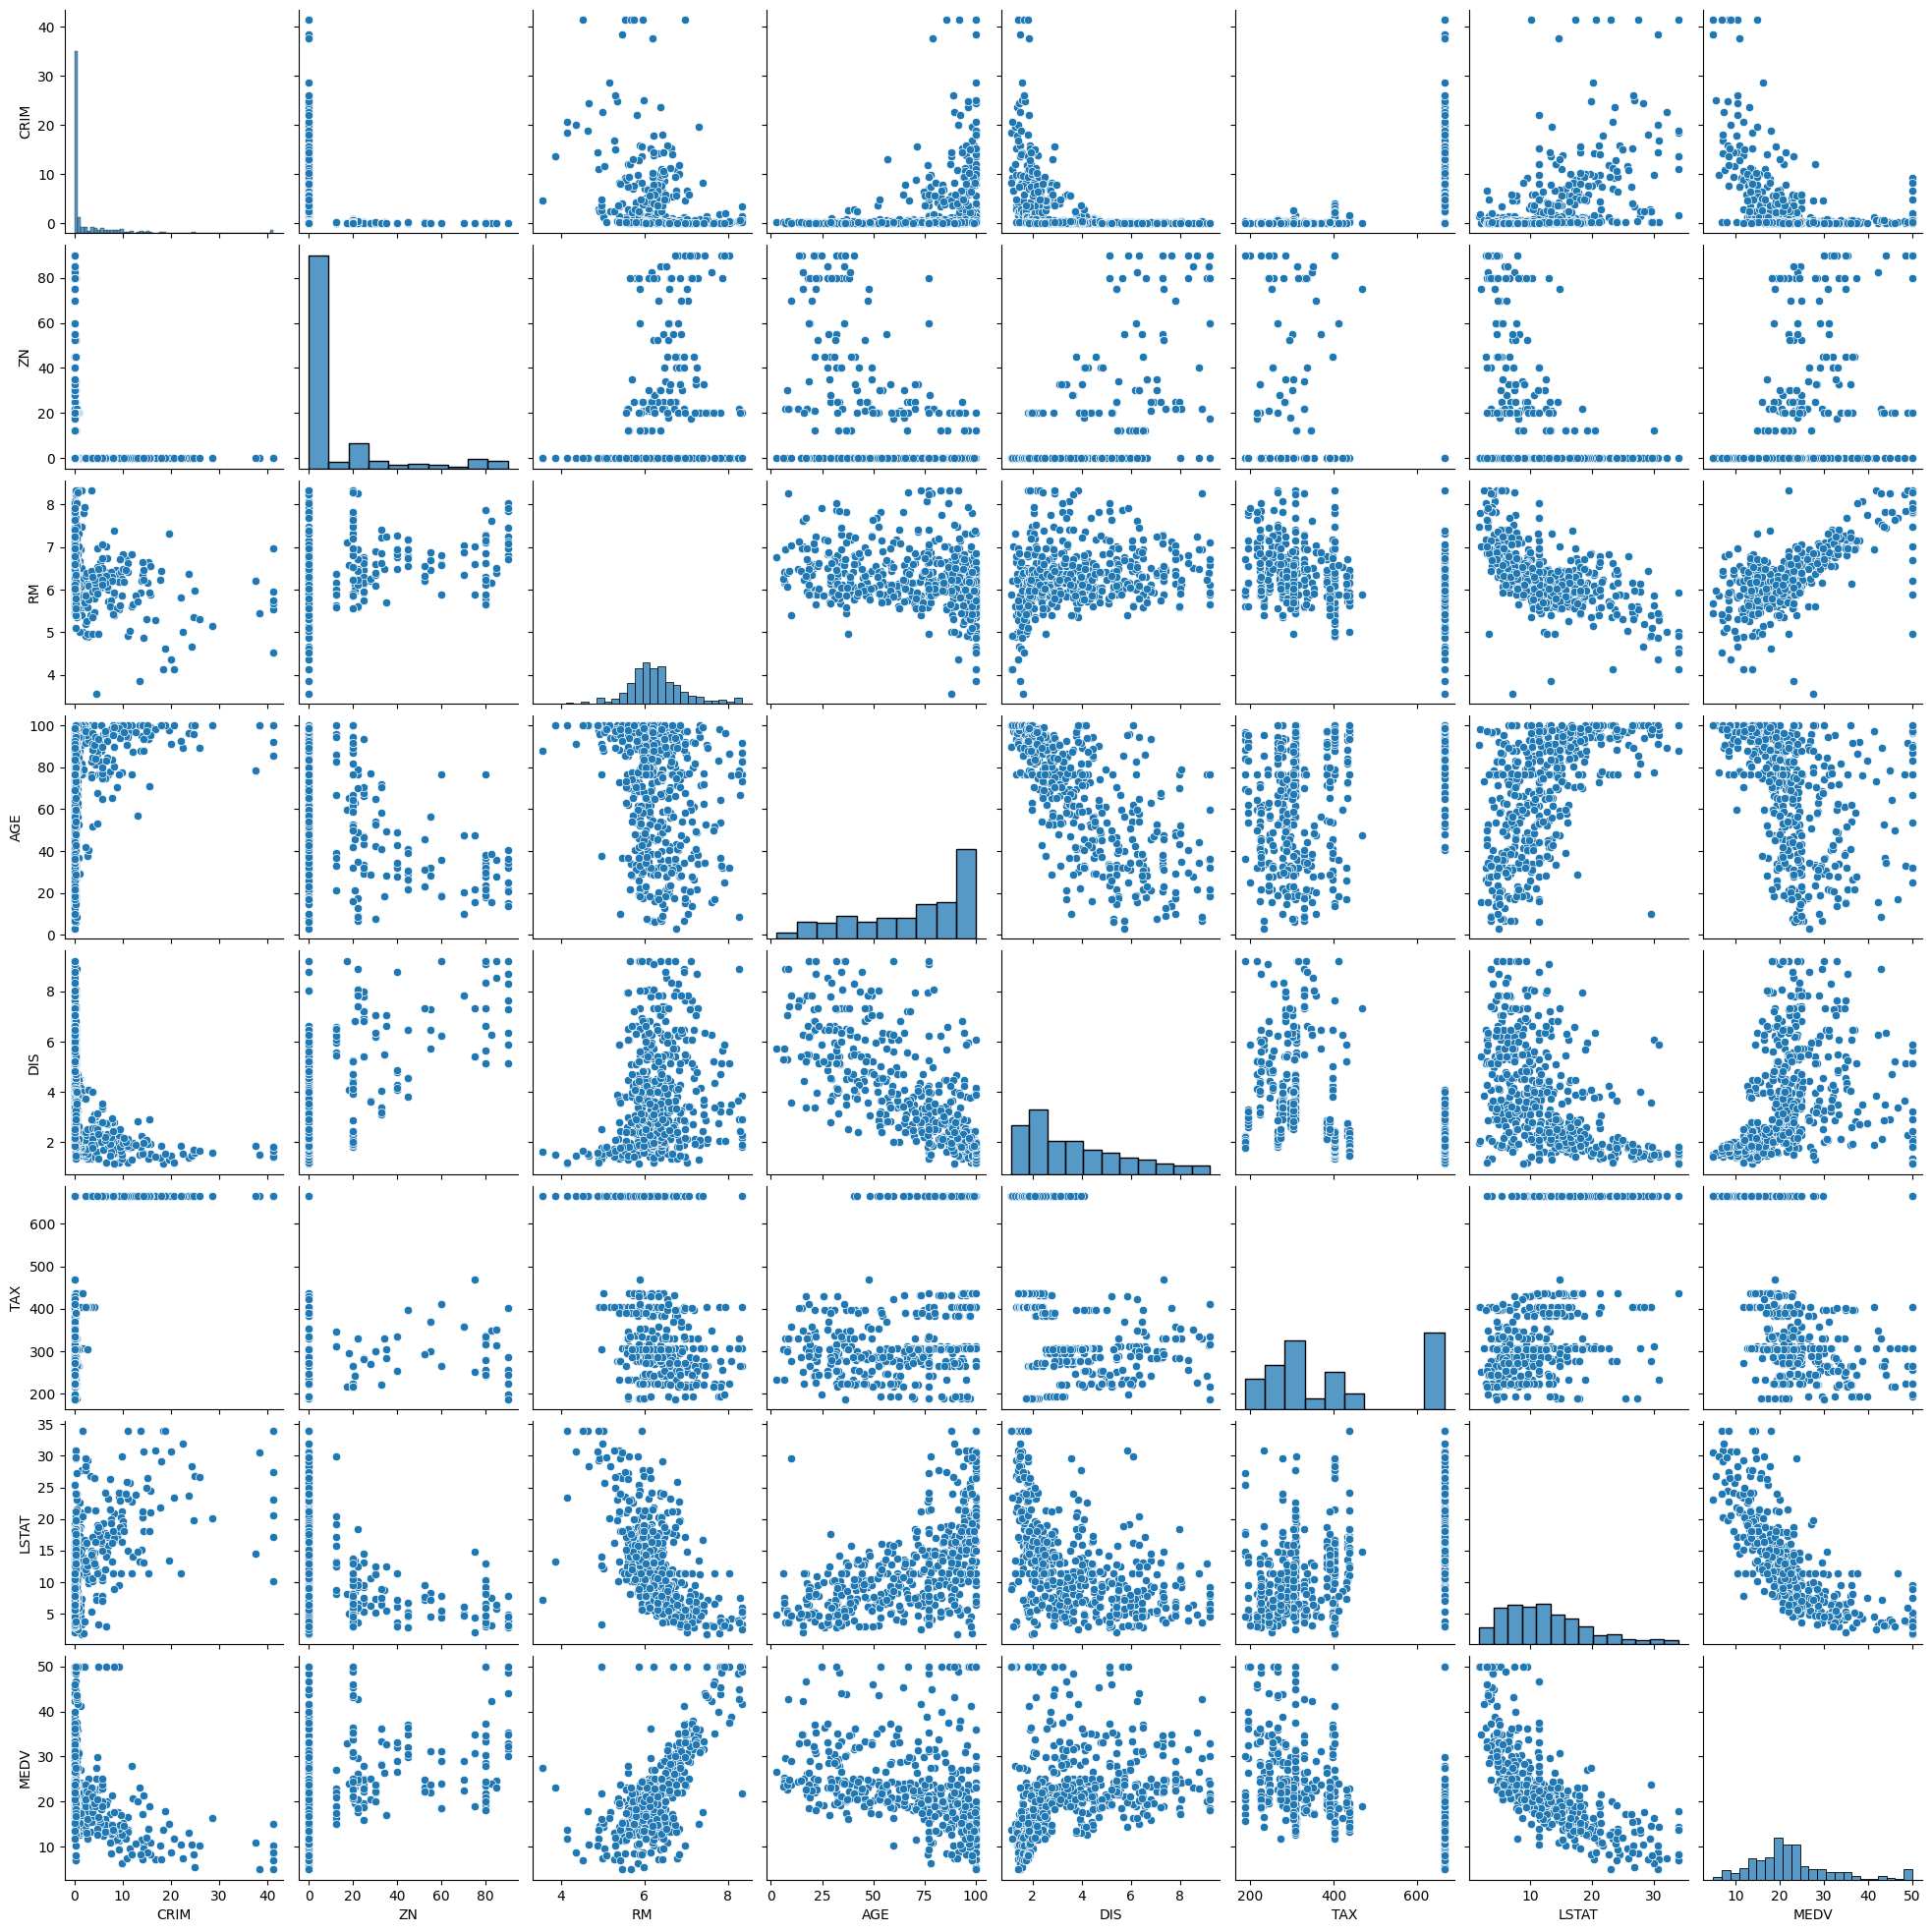

Mean Squared Error: 24.601753959535912
R-squared: 0.6645235947291668


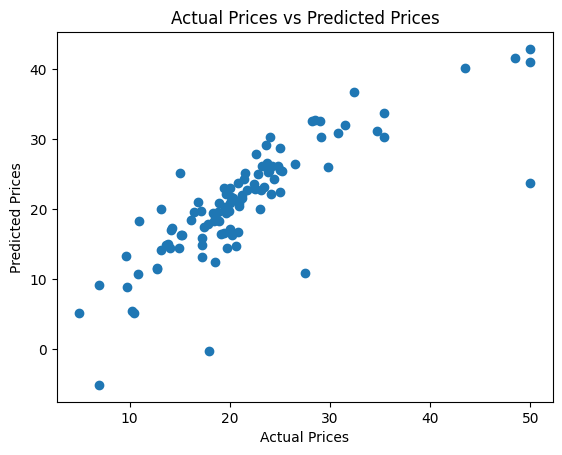

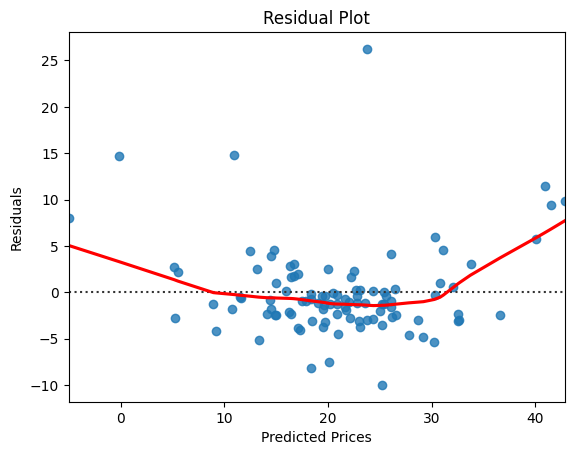

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset from CSV file
file_path = '/content/HousingData.csv'
data = pd.read_csv(file_path)

# Data cleaning
# Check for missing values and fill with median
data = data.fillna(data.median())

# Handle outliers by capping to 99th percentile
for col in data.columns:
    upper_limit = data[col].quantile(0.99)
    data[col] = np.where(data[col] > upper_limit, upper_limit, data[col])

# Data exploration
print(data.describe())
print(data.isnull().sum())

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Pairplot to visualize relationships
sns.pairplot(data[['CRIM', 'ZN', 'RM', 'AGE', 'DIS', 'TAX', 'LSTAT', 'MEDV']])
plt.show()

# Define features and target
features = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
X = data[features]
y = data['MEDV']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Plot the predictions vs actual prices
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

# Residual plot
residuals = y_test - y_pred
sns.residplot(x=y_pred, y=residuals, lowess=True, line_kws={'color': 'red'})
plt.xlabel("Predicted Prices")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()
